In [20]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib as plt

In [11]:
cpuc_tier2 = gpd.read_file('CPUC Fire Threat Tier 2/CPUC_Fire-Threat_Map_Tier_2.shp')

In [14]:
cpuc_tier3 = gpd.read_file('CPUC Fire Threat Tier 3/CPUC_Fire-Threat_Map_Tier_3.shp')

In [9]:
cpuc_map1.head()

,FID,geometry
0,0,(POLYGON ((269553.387793228 -502780.8994589085...


In [5]:
ca_map = gpd.read_file('ca-state-boundary/CA_State_TIGER2016.shp')

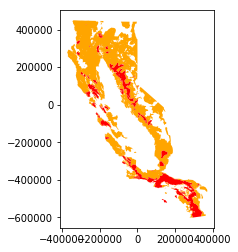

In [27]:
# base = ca_map.plot(color = 'white', edgecolor = 'black')
base = cpuc_tier2.plot(color = 'orange')
cpuc_tier3.plot(ax = base, color = 'red')

In [38]:
berkeley_crimes = pd.read_csv('Berkeley_PD_-_Calls_for_Service.csv')

In [39]:
berkeley_crimes.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,19091845,THEFT FELONY (OVER $950),9/1/19 0:00,11:00,LARCENY,0,11/8/19 7:01,"BOLIVAR DR\nBerkeley, CA",BOLIVAR DR,Berkeley,CA
1,19092225,VANDALISM,10/11/19 0:00,5:00,VANDALISM,5,11/8/19 7:01,"HEARST AVE\nBerkeley, CA",HEARST AVE,Berkeley,CA
2,19051156,VEHICLE STOLEN,9/10/19 0:00,19:00,MOTOR VEHICLE THEFT,2,11/8/19 7:01,"100 MENLO PL\nBerkeley, CA",100 MENLO PL,Berkeley,CA
3,19091890,BURGLARY AUTO,9/8/19 0:00,2:00,BURGLARY - VEHICLE,0,11/8/19 7:01,"HASTE ST\nBerkeley, CA",HASTE ST,Berkeley,CA
4,19041310,VANDALISM,7/29/19 0:00,0:30,VANDALISM,1,11/8/19 7:01,"6000 CHABOLYN TE\nBerkeley, CA",6000 CHABOLYN TE,Berkeley,CA


In [40]:
berkeley_crimes['OFFENSE'].value_counts()

BURGLARY AUTO               1232
THEFT MISD. (UNDER $950)     828
DISTURBANCE                  321
THEFT FELONY (OVER $950)     302
VANDALISM                    287
VEHICLE STOLEN               266
ASSAULT/BATTERY MISD.        200
BURGLARY RESIDENTIAL         185
ROBBERY                      174
NARCOTICS                    155
DOMESTIC VIOLENCE            147
THEFT FROM AUTO              144
BURGLARY COMMERCIAL          136
FRAUD/FORGERY                124
IDENTITY THEFT               123
ALCOHOL OFFENSE              100
ASSAULT/BATTERY FEL.          81
SEXUAL ASSAULT FEL.           45
MISSING ADULT                 31
GUN/WEAPON                    31
SEXUAL ASSAULT MISD.          28
BRANDISHING                   23
THEFT FROM PERSON             23
VEHICLE RECOVERED             15
ARSON                         12
2ND RESPONSE                   9
MISSING JUVENILE               6
KIDNAPPING                     5
MUNICIPAL CODE                 4
DISTURBANCE - NOISE            2
VICE      

In [41]:
robberies = berkeley_crimes[berkeley_crimes['OFFENSE'] == 'ROBBERY']

In [42]:
robberies.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
5,19054596,ROBBERY,9/26/19 0:00,23:20,ROBBERY,4,11/8/19 7:01,"SPRUCE STREET & VINE ST\nBerkeley, CA",SPRUCE STREET & VINE ST,Berkeley,CA
172,19052779,ROBBERY,9/19/19 0:00,0:05,ROBBERY,4,11/8/19 7:01,"2800 CLAREMONT BL\nBerkeley, CA\n(37.860718, -...",2800 CLAREMONT BL,Berkeley,CA
227,19060180,ROBBERY,10/22/19 0:00,16:30,ROBBERY,2,11/8/19 7:01,"2200 MARTIN LUTHER KING JR WY\nBerkeley, CA\n(...",2200 MARTIN LUTHER KING JR WY,Berkeley,CA
237,19028478,ROBBERY,5/25/19 0:00,1:00,ROBBERY,6,11/8/19 7:01,"DURANT AV & TELEGRAPH AV\nBerkeley, CA\n(37.86...",DURANT AV & TELEGRAPH AV,Berkeley,CA
283,19055476,ROBBERY,9/30/19 0:00,20:00,ROBBERY,1,11/8/19 7:01,"3300 ADELINE ST\nBerkeley, CA\n(37.848292, -12...",3300 ADELINE ST,Berkeley,CA


In [45]:
robberies.shape

(174, 11)

In [54]:
count = 0
for i in robberies.index:
    if '(' in robberies.loc[i,'Block_Location']:
        count = count + 1
    else:
        robberies = robberies.drop(i)
        
print(count)
print(robberies.shape)

169
(169, 11)


In [50]:
city_of_berkeley = gpd.read_file('Land Boundary/geo_export_ddcfc4f3-cf2f-4473-a649-da1fa6185450.shp')

In [52]:
city_of_berkeley.head()

,areasqmile,lengthmile,geometry
0,10.511169,21.764084,POLYGON ((-122.2713166496233 37.90494815883994...


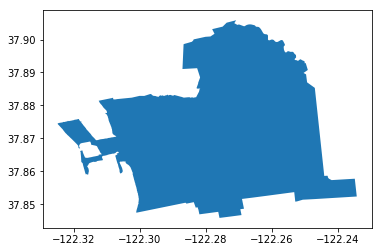

In [51]:
city_of_berkeley.plot()

In [66]:
for i in robberies.index:
    robberies.loc[i,'LatLon'] = robberies.loc[i,'Block_Location'][robberies.loc[i,'Block_Location'].find("(")+1:robberies.loc[i,'Block_Location'].rfind(")")]
    robberies.loc[i,'Lat'] = float(robberies.loc[i,'LatLon'][0:robberies.loc[i,'LatLon'].find(',')])
    robberies.loc[i,'Lon'] = float(robberies.loc[i,'LatLon'][robberies.loc[i,'LatLon'].find(',')+2:])
    
    

In [67]:
robberies.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,LatLon,Lat,Lon
172,19052779,ROBBERY,9/19/19 0:00,0:05,ROBBERY,4,11/8/19 7:01,"2800 CLAREMONT BL\nBerkeley, CA\n(37.860718, -...",2800 CLAREMONT BL,Berkeley,CA,"37.860718, -122.245988",37.8607,-122.246
227,19060180,ROBBERY,10/22/19 0:00,16:30,ROBBERY,2,11/8/19 7:01,"2200 MARTIN LUTHER KING JR WY\nBerkeley, CA\n(...",2200 MARTIN LUTHER KING JR WY,Berkeley,CA,"37.868682, -122.272691",37.8687,-122.273
237,19028478,ROBBERY,5/25/19 0:00,1:00,ROBBERY,6,11/8/19 7:01,"DURANT AV & TELEGRAPH AV\nBerkeley, CA\n(37.86...",DURANT AV & TELEGRAPH AV,Berkeley,CA,"37.867816, -122.258994",37.8678,-122.259
283,19055476,ROBBERY,9/30/19 0:00,20:00,ROBBERY,1,11/8/19 7:01,"3300 ADELINE ST\nBerkeley, CA\n(37.848292, -12...",3300 ADELINE ST,Berkeley,CA,"37.848292, -122.271773",37.8483,-122.272
291,19035109,ROBBERY,6/27/19 0:00,19:45,ROBBERY,4,11/8/19 7:01,"ADELINE STREET & ALCATRAZ AV\nBerkeley, CA\n(3...",ADELINE STREET & ALCATRAZ AV,Berkeley,CA,"37.848752, -122.271331",37.8488,-122.271


In [302]:
from shapely.geometry import Point, LineString, Polygon, box

In [70]:
geometry = [Point(xy) for xy in zip(robberies['Lon'], robberies['Lat'])]

In [73]:
robberies['geometry'] = geometry
robberies_gpd = gpd.GeoDataFrame(robberies)

In [86]:
berkeley_streets = gpd.read_file('Streets Network/geo_export_08cee5a3-1076-4b78-aa00-9668093dba2e.shp')

In [87]:
berkeley_streets.head()

,block_addr,category,f_addl,f_addr,fullname,pav_width_,street_nam,street_typ,t_addl,t_addr,geometry
0,block of The Uplands Ramp,MINOR,0.0,0.0,THE UPLANDS PATH,0.0,THE UPLANDS,PATH,0.0,0.0,LINESTRING (-122.2457684532318 37.853995901645...
1,block of Caldecott Ln,MAJOR,0.0,0.0,CALDECOTT LN,0.0,CALDECOTT,LN,0.0,0.0,LINESTRING (-122.2224000162545 37.853864060491...
2,block of Caldecott Ln,MAJOR,0.0,0.0,CALDECOTT LN,0.0,CALDECOTT,LN,0.0,0.0,LINESTRING (-122.2229368070469 37.853045604365...
3,block of Nogales St Ramp,MINOR,0.0,0.0,NOGALES ST PATH,0.0,NOGALES ST,PATH,0.0,0.0,LINESTRING (-122.2444191053988 37.854215682611...
4,block of The Uplands Ramp,PEDESTRIAN,0.0,0.0,THE UPLANDS PATH,0.0,THE UPLANDS,PATH,0.0,0.0,LINESTRING (-122.2432869198567 37.854242022666...


In [95]:
berkeley_streetlights = gpd.read_file('Streetlights/geo_export_01cdc066-8362-4a5a-90e3-ad4b0285c76b.shp')

In [98]:
berkeley_streetlights.head()

,account,address,arm_length,date_audit,time_audit,city_facil,condition,distributi,facilityid,group,...,spid,twin_pole,unique_id,voltage,warranty,date_warra,time_warra,warranty_p,wattage,geometry
0,6232662070,ADDISON ST,2,2015-05-20,00:00:00.000,S93,OK,3,S93,CityStreetPath,...,7315998285,None,0520_1248_6116,120,5,2015-01-17,00:00:00.000,Graybar,55,POINT (-122.26821599958 37.87128399880363)
1,1005714586,1 Bolivar Drive,2,2015-01-15,00:00:00.000,NO CITY DATA,OK,2,PB44,CityStreetPath,...,METERED,None,0115_1033_1011,120,10,2015-01-13,00:00:00.000,Tanko Lighting,48,POINT (-122.3026500000259 37.86618399898146)
2,6232662070,713 ADDISON ST,2,2015-01-28,00:00:00.000,NO CITY DATA,OK,2,AD715,CityStreetPath,...,7682496694,None,11215_14_06_16,120,10,2015-01-12,00:00:00.000,Tanko Lighting,48,POINT (-122.2999940004867 37.86619899899626)
3,6232662070,SACRAMENTO ST,2,2014-04-16,00:00:00.000,SC3092,OK,2,SC3092,CityStreetPath,...,8013936974,None,0416_1454_5203,120,10,2015-01-09,00:00:00.000,Tanko Lighting,48,POINT (-122.2787889997037 37.851656998801)
4,6232662070,3087 SACRAMENTO ST,2,2014-04-16,00:00:00.000,SC3047,OK,2,SC3047,CityStreetPath,...,8013939014,None,0416_1418_3519,120,10,2015-01-09,00:00:00.000,Tanko Lighting,48,POINT (-122.2785029996196 37.8516959988152)


In [106]:
berkeley_crimes['CVLEGEND'].value_counts()

BURGLARY - VEHICLE        1232
LARCENY                   1153
DISORDERLY CONDUCT         323
VANDALISM                  287
ASSAULT                    281
MOTOR VEHICLE THEFT        266
FRAUD                      247
BURGLARY - RESIDENTIAL     185
ROBBERY                    174
DRUG VIOLATION             155
FAMILY OFFENSE             147
LARCENY - FROM VEHICLE     144
BURGLARY - COMMERCIAL      136
LIQUOR LAW VIOLATION       100
SEX CRIME                   73
WEAPONS OFFENSE             54
MISSING PERSON              37
RECOVERED VEHICLE           15
ARSON                       12
NOISE VIOLATION             11
KIDNAPPING                   5
ALL OTHER OFFENSES           4
DUI                          1
Name: CVLEGEND, dtype: int64

In [108]:
assaults = berkeley_crimes[berkeley_crimes['CVLEGEND'] == 'ASSAULT']
assaults.shape

(281, 11)

In [110]:
count = 0
for i in assaults.index:
    if '(' in assaults.loc[i,'Block_Location']:
        count = count + 1
    else:
        assaults = assaults.drop(i)
        
print(count)
print(assaults.shape)

270
(270, 14)


In [111]:
for i in assaults.index:
    assaults.loc[i,'LatLon'] = assaults.loc[i,'Block_Location'][assaults.loc[i,'Block_Location'].find("(")+1:assaults.loc[i,'Block_Location'].rfind(")")]
    assaults.loc[i,'Lat'] = float(assaults.loc[i,'LatLon'][0:assaults.loc[i,'LatLon'].find(',')])
    assaults.loc[i,'Lon'] = float(assaults.loc[i,'LatLon'][assaults.loc[i,'LatLon'].find(',')+2:])
    
geometry = [Point(xy) for xy in zip(assaults['Lon'], assaults['Lat'])]
assaults['geometry'] = geometry
assaults_gpd = gpd.GeoDataFrame(assaults)

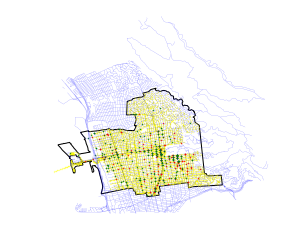

In [114]:
base = city_of_berkeley.plot(color = 'white', edgecolor = 'black', legend = True);
berkeley_streets.plot(ax = base, linewidth = 0.1, color = 'blue', legend = True);
berkeley_streetlights.plot(ax = base, color = 'yellow', alpha = 0.5, markersize = 0.1, legend = True)
robberies_gpd.plot(ax = base, markersize = 0.2, color = 'red', legend = True);
assaults_gpd.plot(ax = base, markersize = 0.2, color = 'green', legend = True)
base.axis('off');

plt.pyplot.savefig('cityofberkeleycrimes.png', dpi = 700)

In [364]:
# Grouping all burglary crimes together from the original df

def group_burglaries(s):
    if s[0] == 'B':
        return 'BURGLARY'
    else:
        return s
# group the burglary ones together
berkeley_crimes['CVLEGEND'] = berkeley_crimes['CVLEGEND'].apply(group_burglaries)

In [365]:
crimes_lim = ['ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX CRIME']

# Create data frame with only crimes of the type in crimes_lin
combined = berkeley_crimes[berkeley_crimes['CVLEGEND'].isin(crimes_lim)]
# combined = berkeley_crimes[(berkeley_crimes['CVLEGEND'] == 'ASSAULT') | (berkeley_crimes['CVLEGEND'] == 'ROBBERY')]
combined.shape

(2347, 11)

In [366]:
count = 0
for i in combined.index:
    if '(' in combined.loc[i,'Block_Location']:
        count = count + 1
    else:
        combined = combined.drop(i)
        
print(count)
print(combined.shape)

2279
(2279, 11)


In [367]:
for i in combined.index:
    combined.loc[i,'LatLon'] = combined.loc[i,'Block_Location'][combined.loc[i,'Block_Location'].find("(")+1:combined.loc[i,'Block_Location'].rfind(")")]
    combined.loc[i,'Lat'] = float(combined.loc[i,'LatLon'][0:combined.loc[i,'LatLon'].find(',')])
    combined.loc[i,'Lon'] = float(combined.loc[i,'LatLon'][combined.loc[i,'LatLon'].find(',')+2:])
    
geometry = [Point(xy) for xy in zip(combined['Lon'], combined['Lat'])]
combined['geometry'] = geometry
combined_gpd = gpd.GeoDataFrame(combined)

In [125]:
berkeley_streets['geometry str'] = str(berkeley_streets['geometry'])

In [126]:
berkeley_streets.head()

,block_addr,category,f_addl,f_addr,fullname,pav_width_,street_nam,street_typ,t_addl,t_addr,geometry,geometry str
0,block of The Uplands Ramp,MINOR,0.0,0.0,THE UPLANDS PATH,0.0,THE UPLANDS,PATH,0.0,0.0,LINESTRING (-122.2457684532318 37.853995901645...,0 LINESTRING (-122.2457684532318 37.8539...
1,block of Caldecott Ln,MAJOR,0.0,0.0,CALDECOTT LN,0.0,CALDECOTT,LN,0.0,0.0,LINESTRING (-122.2224000162545 37.853864060491...,0 LINESTRING (-122.2457684532318 37.8539...
2,block of Caldecott Ln,MAJOR,0.0,0.0,CALDECOTT LN,0.0,CALDECOTT,LN,0.0,0.0,LINESTRING (-122.2229368070469 37.853045604365...,0 LINESTRING (-122.2457684532318 37.8539...
3,block of Nogales St Ramp,MINOR,0.0,0.0,NOGALES ST PATH,0.0,NOGALES ST,PATH,0.0,0.0,LINESTRING (-122.2444191053988 37.854215682611...,0 LINESTRING (-122.2457684532318 37.8539...
4,block of The Uplands Ramp,PEDESTRIAN,0.0,0.0,THE UPLANDS PATH,0.0,THE UPLANDS,PATH,0.0,0.0,LINESTRING (-122.2432869198567 37.854242022666...,0 LINESTRING (-122.2457684532318 37.8539...


In [127]:
city_of_berkeley.head()

,areasqmile,lengthmile,geometry
0,10.511169,21.764084,POLYGON ((-122.2713166496233 37.90494815883994...


In [172]:
berkeley_coords = str(city_of_berkeley.loc[0,'geometry']).split()
berkeley_coords

['POLYGON',
 '((-122.2713166496233',
 '37.90494815883994,',
 '-122.2703675777322',
 '37.90442163342669,',
 '-122.2703041071134',
 '37.9044558407529,',
 '-122.2702362960552',
 '37.90448434342699,',
 '-122.2701649579052',
 '37.90450679957715,',
 '-122.2700909483188',
 '37.90452293985567,',
 '-122.2700151549955',
 '37.90453257066971,',
 '-122.2699384870314',
 '37.90453557650357,',
 '-122.2698618640137',
 '37.90453192130425,',
 '-122.2697862049907',
 '37.90452164891391,',
 '-122.2697124174469',
 '37.90450488254402,',
 '-122.2696413864185',
 '37.9044818232973,',
 '-122.2693326010041',
 '37.90436633655573,',
 '-122.2685063087688',
 '37.90405882062777,',
 '-122.2684506933384',
 '37.90404148952824,',
 '-122.2683925242427',
 '37.90403062942639,',
 '-122.2683329939849',
 '37.90402646296086,',
 '-122.2682733229713',
 '37.90402907554653,',
 '-122.2682147344939',
 '37.90403841362365,',
 '-122.2681584296526',
 '37.90405428575578,',
 '-122.2681055627333',
 '37.90407636655415,',
 '-122.2680572175448',

In [173]:
berkeley_coords.remove('POLYGON')

In [174]:
berkeley_coords

['((-122.2713166496233',
 '37.90494815883994,',
 '-122.2703675777322',
 '37.90442163342669,',
 '-122.2703041071134',
 '37.9044558407529,',
 '-122.2702362960552',
 '37.90448434342699,',
 '-122.2701649579052',
 '37.90450679957715,',
 '-122.2700909483188',
 '37.90452293985567,',
 '-122.2700151549955',
 '37.90453257066971,',
 '-122.2699384870314',
 '37.90453557650357,',
 '-122.2698618640137',
 '37.90453192130425,',
 '-122.2697862049907',
 '37.90452164891391,',
 '-122.2697124174469',
 '37.90450488254402,',
 '-122.2696413864185',
 '37.9044818232973,',
 '-122.2693326010041',
 '37.90436633655573,',
 '-122.2685063087688',
 '37.90405882062777,',
 '-122.2684506933384',
 '37.90404148952824,',
 '-122.2683925242427',
 '37.90403062942639,',
 '-122.2683329939849',
 '37.90402646296086,',
 '-122.2682733229713',
 '37.90402907554653,',
 '-122.2682147344939',
 '37.90403841362365,',
 '-122.2681584296526',
 '37.90405428575578,',
 '-122.2681055627333',
 '37.90407636655415,',
 '-122.2680572175448',
 '37.904104

In [175]:
berkeley_coords[0] = berkeley_coords[0][2:]
berkeley_coords[5367] = berkeley_coords[5367][0:len(berkeley_coords[5367])-2]
for i in np.arange(len(berkeley_coords)):
    if ',' in berkeley_coords[i]:
        berkeley_coords[i] = berkeley_coords[i][0:len(berkeley_coords[i])-1]

In [176]:
berkeley_coords

['-122.2713166496233',
 '37.90494815883994',
 '-122.2703675777322',
 '37.90442163342669',
 '-122.2703041071134',
 '37.9044558407529',
 '-122.2702362960552',
 '37.90448434342699',
 '-122.2701649579052',
 '37.90450679957715',
 '-122.2700909483188',
 '37.90452293985567',
 '-122.2700151549955',
 '37.90453257066971',
 '-122.2699384870314',
 '37.90453557650357',
 '-122.2698618640137',
 '37.90453192130425',
 '-122.2697862049907',
 '37.90452164891391',
 '-122.2697124174469',
 '37.90450488254402',
 '-122.2696413864185',
 '37.9044818232973',
 '-122.2693326010041',
 '37.90436633655573',
 '-122.2685063087688',
 '37.90405882062777',
 '-122.2684506933384',
 '37.90404148952824',
 '-122.2683925242427',
 '37.90403062942639',
 '-122.2683329939849',
 '37.90402646296086',
 '-122.2682733229713',
 '37.90402907554653',
 '-122.2682147344939',
 '37.90403841362365',
 '-122.2681584296526',
 '37.90405428575578',
 '-122.2681055627333',
 '37.90407636655415',
 '-122.2680572175448',
 '37.90410420334826',
 '-122.26790

In [181]:
berkeley_coords = [float(i) for i in berkeley_coords]

In [184]:
berkeley_coords_lat = [i for i in berkeley_coords if i > 0]
berkeley_coords_lon = [i for i in berkeley_coords if i < 0]

In [187]:
min_lon = min(berkeley_coords_lon)
max_lon = max(berkeley_coords_lon)
min_lat = min(berkeley_coords_lat)
max_lat = max(berkeley_coords_lat)

In [189]:
print(min_lon)
print(max_lon)
print(min_lat)
print(max_lat)

-122.3248898948758
-122.2341693306841
37.84588599818213
37.90584136967829


In [206]:
west_boundary = LineString([(min_lon, min_lat), (min_lon, max_lat)])
east_boundary = LineString([(max_lon, min_lat), (max_lon, max_lat)])
south_boundary = LineString([(min_lon, min_lat), (max_lon, min_lat)])
north_boundary = LineString([(min_lon, max_lat), (max_lon, max_lat)])

In [252]:
city_boundary = gpd.GeoDataFrame()
city_boundary['geometry'] = [west_boundary, east_boundary, south_boundary, north_boundary]
city_boundary['desc'] = ['west', 'east', 'south', 'north']

In [253]:
divisions = 10
lon_addition = (max_lon - min_lon) / divisions
lat_addition = (max_lat - min_lat) / divisions
lon_divisions = [min_lon]
lat_divisions = [min_lat]

for i in np.arange(divisions-1):
    lon_add = lon_addition * (i+1)
    lat_add = lat_addition * (i+1)
    lon_divisions.append(min_lon + lon_add)
    lat_divisions.append(min_lat + lat_add)
    
    lon_modified = LineString([(min_lon + lon_add, min_lat), (min_lon + lon_add, max_lat)])
    lon_label = 'lon' + str(i+1)
    lat_modified = LineString([(min_lon, min_lat + lat_add), (max_lon, min_lat + lat_add)])
    lat_label = 'lat' + str(i+1)
    city_boundary = city_boundary.append({'geometry' : lon_modified, 'desc' : lon_label}, ignore_index = True)
    city_boundary = city_boundary.append({'geometry' : lat_modified, 'desc' : lat_label}, ignore_index = True)
    
lon_divisions.append(max_lon)
lat_divisions.append(max_lat)

In [254]:
city_boundary

,geometry,desc
0,LINESTRING (-122.3248898948758 37.845885998182...,west
1,LINESTRING (-122.2341693306841 37.845885998182...,east
2,LINESTRING (-122.3248898948758 37.845885998182...,south
3,LINESTRING (-122.3248898948758 37.905841369678...,north
4,LINESTRING (-122.3158178384566 37.845885998182...,lon1
5,LINESTRING (-122.3248898948758 37.851881535331...,lat1
6,LINESTRING (-122.3067457820375 37.845885998182...,lon2
7,LINESTRING (-122.3248898948758 37.857877072481...,lat2
8,LINESTRING (-122.2976737256183 37.845885998182...,lon3
9,LINESTRING (-122.3248898948758 37.863872609630...,lat3


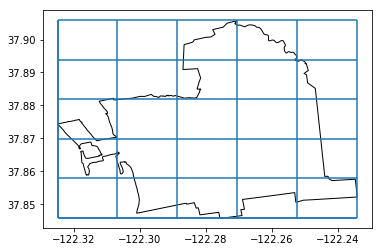

In [228]:
city = city_of_berkeley.plot(color = 'white', edgecolor = 'black')
city_boundary.plot(ax = city)

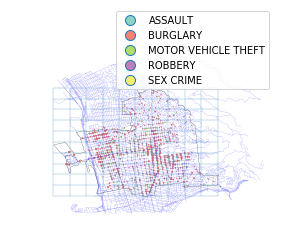

In [371]:
city = city_of_berkeley.plot(color = 'white', edgecolor = 'black', linewidth = 0.2);
berkeley_streets.plot(ax = city, linewidth = 0.1, color = 'blue');
# berkeley_streetlights.plot(ax = city, color = 'yellow', alpha = 0.5, markersize = 0.1)
combined_gpd.plot(ax = city, column = 'CVLEGEND', markersize = 0.2, legend = True, cmap = 'Set3')
city_boundary.plot(ax = city, linewidth = 0.25)
city.axis('off')
plt.pyplot.savefig('cityofberkeleycrimes_divided.png', dpi = 700)

In [255]:
lat_divisions

[37.84588599818213,
 37.85188153533175,
 37.857877072481365,
 37.86387260963098,
 37.8698681467806,
 37.87586368393021,
 37.88185922107983,
 37.887854758229444,
 37.89385029537906,
 37.899845832528676,
 37.90584136967829]

In [256]:
lon_divisions

[-122.3248898948758,
 -122.31581783845662,
 -122.30674578203745,
 -122.29767372561828,
 -122.28860166919911,
 -122.27952961277995,
 -122.27045755636078,
 -122.26138549994161,
 -122.25231344352244,
 -122.24324138710327,
 -122.2341693306841]

In [372]:
for i in combined.index:
    # Assigning the appropriate ('box')
    lat_val = combined.loc[i,'Lat']
    lon_val = combined.loc[i,'Lon']
    for j in np.arange(len(lat_divisions)-1)+1:
        if lat_val / lat_divisions[j] < 1:
            row_num = j
            break
    for j in np.arange(len(lon_divisions)-1)+1:
        if lon_val / lon_divisions[j] > 1:
            col_num = j
            break
    combined.loc[i,'BOXNUM'] = divisions*(row_num-1) + col_num

In [373]:
combined['BOXNUM'].value_counts()

37.0    218
38.0    181
46.0    128
54.0    115
34.0     93
57.0     93
53.0     84
21.0     74
33.0     72
44.0     66
47.0     63
28.0     63
17.0     62
27.0     60
6.0      59
36.0     57
45.0     51
32.0     49
24.0     48
18.0     39
67.0     38
43.0     37
16.0     34
56.0     34
75.0     29
26.0     26
66.0     24
55.0     23
4.0      23
15.0     22
       ... 
29.0     20
35.0     18
77.0     17
58.0     17
65.0     16
63.0     16
64.0     15
5.0      14
23.0     14
25.0     11
41.0     10
85.0     10
76.0      9
97.0      9
68.0      9
78.0      8
87.0      8
19.0      8
86.0      7
52.0      6
96.0      6
20.0      5
69.0      5
8.0       3
88.0      3
9.0       2
48.0      2
49.0      2
62.0      1
42.0      1
Name: BOXNUM, Length: 62, dtype: int64

In [374]:
combined.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,LatLon,Lat,Lon,geometry,BOXNUM
9,19059507,BURGLARY AUTO,10/19/19 0:00,21:41,BURGLARY,6,11/8/19 7:01,"3200 ADELINE ST\nBerkeley, CA\n(37.850385, -12...",3200 ADELINE ST,Berkeley,CA,"37.850385, -122.270897",37.850385,-122.270897,POINT (-122.270897 37.850385),6.0
10,19050930,BURGLARY AUTO,9/10/19 0:00,15:00,BURGLARY,2,11/8/19 7:01,"700 HEARST AV\nBerkeley, CA\n(37.868663, -122....",700 HEARST AV,Berkeley,CA,"37.868663, -122.301325",37.868663,-122.301325,POINT (-122.301325 37.868663),33.0
12,19037419,BURGLARY RESIDENTIAL,7/10/19 0:00,2:00,BURGLARY,3,11/8/19 7:01,"2300 BANCROFT WY\nBerkeley, CA\n(37.868199, -1...",2300 BANCROFT WY,Berkeley,CA,"37.868199, -122.263253",37.868199,-122.263253,POINT (-122.263253 37.868199),37.0
17,19043249,VEHICLE STOLEN,8/6/19 0:00,14:30,MOTOR VEHICLE THEFT,2,11/8/19 7:01,"1100 WALNUT ST\nBerkeley, CA\n(37.887961, -122...",1100 WALNUT ST,Berkeley,CA,"37.887961, -122.269822",37.887961,-122.269822,POINT (-122.269822 37.887961),77.0
19,19034048,SEXUAL ASSAULT MISD.,6/22/19 0:00,13:15,SEX CRIME,6,11/8/19 7:01,"2500 DWIGHT WY\nBerkeley, CA\n(37.865134, -122...",2500 DWIGHT WY,Berkeley,CA,"37.865134, -122.258331",37.865134,-122.258331,POINT (-122.258331 37.865134),38.0


## Heat mapping??

In [375]:
berkeley_boxes2 = gpd.GeoDataFrame()


In [332]:
lat_point_list = [50.854457, 52.518172, 50.072651, 48.853033, 50.854457]
lon_point_list = [4.377184, 13.407759, 14.435935, 2.349553, 4.377184]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
# polygon = gpd.GeoDataFrame(index=[0], geometry=[polygon_geom])
berkeley_boxes = berkeley_boxes.append({'geometry' : polygon_geom}, ignore_index=True)

,geometry
0,"POLYGON ((4.377184 50.854457, 13.407759 52.518..."
1,"POLYGON ((4.377184 50.854457, 13.407759 52.518..."


In [377]:
for row in np.arange(divisions):
    for col in np.arange(divisions):
        bottom_left_lat = lat_divisions[row]
        bottom_left_lon = lon_divisions[col]
        
        bottom_right_lat = lat_divisions[row]
        bottom_right_lon = lon_divisions[col+1]
        
        top_left_lat = lat_divisions[row+1]
        top_left_lon = lon_divisions[col]
        
        top_right_lat = lat_divisions[row+1]
        top_right_lon = lon_divisions[col+1]
        
        lat_point_list = [bottom_left_lat, top_left_lat, top_right_lat, bottom_right_lat]
        lon_point_list = [bottom_left_lon, top_left_lon, top_right_lon, bottom_right_lon]
        
        polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
        berkeley_boxes2 = berkeley_boxes2.append({'geometry' : polygon_geom}, ignore_index=True)

In [378]:
berkeley_boxes2

,geometry
0,POLYGON ((-122.3248898948758 37.84588599818213...
1,POLYGON ((-122.3158178384566 37.84588599818213...
2,POLYGON ((-122.3067457820375 37.84588599818213...
3,POLYGON ((-122.2976737256183 37.84588599818213...
4,POLYGON ((-122.2886016691991 37.84588599818213...
5,"POLYGON ((-122.27952961278 37.84588599818213, ..."
6,POLYGON ((-122.2704575563608 37.84588599818213...
7,POLYGON ((-122.2613854999416 37.84588599818213...
8,POLYGON ((-122.2523134435224 37.84588599818213...
9,POLYGON ((-122.2432413871033 37.84588599818213...


In [379]:
box_nums = combined['BOXNUM'].value_counts().keys().tolist()
crime_freq = combined['BOXNUM'].value_counts().tolist()

In [380]:
for i in np.arange(len(box_nums)):
    box_num = box_nums[i] - 1
    berkeley_boxes2.loc[box_num, 'crime_freq'] = crime_freq[i]

In [381]:
for i in berkeley_boxes2.index:
    if np.isnan(berkeley_boxes2.loc[i, 'crime_freq']):
        berkeley_boxes2.loc[i, 'crime_freq'] = 0
        
berkeley_boxes2

,geometry,crime_freq
0,POLYGON ((-122.3248898948758 37.84588599818213...,0.0
1,POLYGON ((-122.3158178384566 37.84588599818213...,0.0
2,POLYGON ((-122.3067457820375 37.84588599818213...,0.0
3,POLYGON ((-122.2976737256183 37.84588599818213...,23.0
4,POLYGON ((-122.2886016691991 37.84588599818213...,14.0
5,"POLYGON ((-122.27952961278 37.84588599818213, ...",59.0
6,POLYGON ((-122.2704575563608 37.84588599818213...,0.0
7,POLYGON ((-122.2613854999416 37.84588599818213...,3.0
8,POLYGON ((-122.2523134435224 37.84588599818213...,2.0
9,POLYGON ((-122.2432413871033 37.84588599818213...,0.0


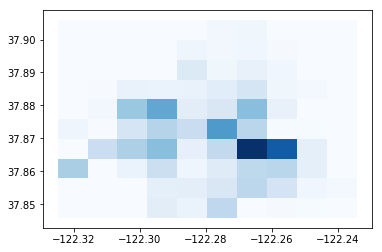

In [382]:
berkeley_boxes2.plot(column = 'crime_freq', cmap = 'Blues');

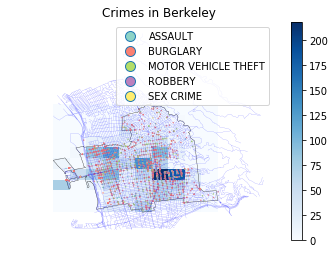

In [398]:
crime_boxes = berkeley_boxes2.plot(column = 'crime_freq', cmap = 'Blues', legend = True);
city_of_berkeley.plot(ax = crime_boxes, color = 'none', edgecolor = 'black', linewidth = 0.3);
berkeley_streets.plot(ax = crime_boxes, linewidth = 0.1, color = 'blue');
# berkeley_streetlights.plot(ax = city, color = 'yellow', alpha = 0.5, markersize = 0.1)
combined_gpd.plot(ax = crime_boxes, column = 'CVLEGEND', markersize = 0.2, legend = True, cmap = 'Set3')
# city_boundary.plot(ax = city, linewidth = 0.25)

crime_boxes.axis('off')
crime_boxes.set_title('Crimes in Berkeley')
plt.pyplot.savefig('cityofberkeleycrimes_freq.png', dpi = 700)

## Assault

In [386]:
# Create a new data frame, bpd_assault, that only contains assault crimes

bpd_assault = berkeley_crimes[berkeley_crimes['CVLEGEND'] == 'ASSAULT']

count = 0
for i in bpd_assault.index:
    if '(' in bpd_assault.loc[i,'Block_Location']:
        count = count + 1
    else:
        bpd_assault = bpd_assault.drop(i)
        
print(count)
print(bpd_assault.shape)

for i in bpd_assault.index:
    bpd_assault.loc[i,'LatLon'] = bpd_assault.loc[i,'Block_Location'][bpd_assault.loc[i,'Block_Location'].find("(")+1:bpd_assault.loc[i,'Block_Location'].rfind(")")]
    bpd_assault.loc[i,'Lat'] = float(bpd_assault.loc[i,'LatLon'][0:bpd_assault.loc[i,'LatLon'].find(',')])
    bpd_assault.loc[i,'Lon'] = float(bpd_assault.loc[i,'LatLon'][bpd_assault.loc[i,'LatLon'].find(',')+2:])
    
geometry = [Point(xy) for xy in zip(bpd_assault['Lon'], bpd_assault['Lat'])]
bpd_assault['geometry'] = geometry
bpd_assault_gpd = gpd.GeoDataFrame(bpd_assault)

270
(270, 11)


In [387]:
for i in bpd_assault.index:
    # Assigning the appropriate ('box')
    lat_val = bpd_assault.loc[i,'Lat']
    lon_val = bpd_assault.loc[i,'Lon']
    for j in np.arange(len(lat_divisions)-1)+1:
        if lat_val / lat_divisions[j] < 1:
            row_num = j
            break
    for j in np.arange(len(lon_divisions)-1)+1:
        if lon_val / lon_divisions[j] > 1:
            col_num = j
            break
    bpd_assault.loc[i,'BOXNUM'] = divisions*(row_num-1) + col_num

In [388]:
box_nums_assault = bpd_assault['BOXNUM'].value_counts().keys().tolist()
crime_freq_assault = bpd_assault['BOXNUM'].value_counts().tolist()

In [389]:
berkeley_boxes_assault = gpd.GeoDataFrame()

for row in np.arange(divisions):
    for col in np.arange(divisions):
        bottom_left_lat = lat_divisions[row]
        bottom_left_lon = lon_divisions[col]
        
        bottom_right_lat = lat_divisions[row]
        bottom_right_lon = lon_divisions[col+1]
        
        top_left_lat = lat_divisions[row+1]
        top_left_lon = lon_divisions[col]
        
        top_right_lat = lat_divisions[row+1]
        top_right_lon = lon_divisions[col+1]
        
        lat_point_list = [bottom_left_lat, top_left_lat, top_right_lat, bottom_right_lat]
        lon_point_list = [bottom_left_lon, top_left_lon, top_right_lon, bottom_right_lon]
        
        polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
        berkeley_boxes_assault = berkeley_boxes_assault.append({'geometry' : polygon_geom}, ignore_index=True)

for i in np.arange(len(box_nums_assault)):
    box_num = box_nums_assault[i] - 1
    berkeley_boxes_assault.loc[box_num, 'crime_freq'] = crime_freq_assault[i]
        
for i in berkeley_boxes_assault.index:
    if np.isnan(berkeley_boxes_assault.loc[i, 'crime_freq']):
        berkeley_boxes_assault.loc[i, 'crime_freq'] = 0
        
berkeley_boxes_assault

,geometry,crime_freq
0,POLYGON ((-122.3248898948758 37.84588599818213...,0.0
1,POLYGON ((-122.3158178384566 37.84588599818213...,0.0
2,POLYGON ((-122.3067457820375 37.84588599818213...,0.0
3,POLYGON ((-122.2976737256183 37.84588599818213...,0.0
4,POLYGON ((-122.2886016691991 37.84588599818213...,0.0
5,"POLYGON ((-122.27952961278 37.84588599818213, ...",11.0
6,POLYGON ((-122.2704575563608 37.84588599818213...,0.0
7,POLYGON ((-122.2613854999416 37.84588599818213...,0.0
8,POLYGON ((-122.2523134435224 37.84588599818213...,0.0
9,POLYGON ((-122.2432413871033 37.84588599818213...,0.0


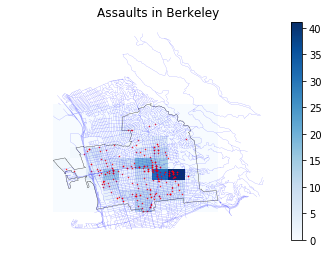

In [397]:
crime_boxes = berkeley_boxes_assault.plot(column = 'crime_freq', cmap = 'Blues', legend = True);
city_of_berkeley.plot(ax = crime_boxes, color = 'none', edgecolor = 'black', linewidth = 0.3);
berkeley_streets.plot(ax = crime_boxes, linewidth = 0.1, color = 'blue');
# berkeley_streetlights.plot(ax = city, color = 'yellow', alpha = 0.5, markersize = 0.1)
assaults_gpd.plot(ax = crime_boxes, markersize = 0.2, color = 'red')
# city_boundary.plot(ax = city, linewidth = 0.25)

crime_boxes.axis('off')
crime_boxes.set_title('Assaults in Berkeley')
plt.pyplot.savefig('cityofberkeleycrimes_assaultfreq.png', dpi = 700)

## Burglaries

In [399]:
# Create a new data frame, bpd_burglary, that only contains burglary crimes

bpd_burglary = berkeley_crimes[berkeley_crimes['CVLEGEND'] == 'BURGLARY']

count = 0
for i in bpd_burglary.index:
    if '(' in bpd_burglary.loc[i,'Block_Location']:
        count = count + 1
    else:
        bpd_burglary = bpd_burglary.drop(i)
        
print(count)
print(bpd_burglary.shape)

for i in bpd_burglary.index:
    bpd_burglary.loc[i,'LatLon'] = bpd_burglary.loc[i,'Block_Location'][bpd_burglary.loc[i,'Block_Location'].find("(")+1:bpd_burglary.loc[i,'Block_Location'].rfind(")")]
    bpd_burglary.loc[i,'Lat'] = float(bpd_burglary.loc[i,'LatLon'][0:bpd_burglary.loc[i,'LatLon'].find(',')])
    bpd_burglary.loc[i,'Lon'] = float(bpd_burglary.loc[i,'LatLon'][bpd_burglary.loc[i,'LatLon'].find(',')+2:])
    
geometry = [Point(xy) for xy in zip(bpd_burglary['Lon'], bpd_burglary['Lat'])]
bpd_burglary['geometry'] = geometry
bpd_burglary_gpd = gpd.GeoDataFrame(bpd_burglary)

1517
(1517, 11)


In [400]:
for i in bpd_burglary.index:
    # Assigning the appropriate ('box')
    lat_val = bpd_burglary.loc[i,'Lat']
    lon_val = bpd_burglary.loc[i,'Lon']
    for j in np.arange(len(lat_divisions)-1)+1:
        if lat_val / lat_divisions[j] < 1:
            row_num = j
            break
    for j in np.arange(len(lon_divisions)-1)+1:
        if lon_val / lon_divisions[j] > 1:
            col_num = j
            break
    bpd_burglary.loc[i,'BOXNUM'] = divisions*(row_num-1) + col_num

In [401]:
box_nums_burglary = bpd_burglary['BOXNUM'].value_counts().keys().tolist()
crime_freq_burglary = bpd_burglary['BOXNUM'].value_counts().tolist()

In [402]:
berkeley_boxes_burglary = gpd.GeoDataFrame()

for row in np.arange(divisions):
    for col in np.arange(divisions):
        bottom_left_lat = lat_divisions[row]
        bottom_left_lon = lon_divisions[col]
        
        bottom_right_lat = lat_divisions[row]
        bottom_right_lon = lon_divisions[col+1]
        
        top_left_lat = lat_divisions[row+1]
        top_left_lon = lon_divisions[col]
        
        top_right_lat = lat_divisions[row+1]
        top_right_lon = lon_divisions[col+1]
        
        lat_point_list = [bottom_left_lat, top_left_lat, top_right_lat, bottom_right_lat]
        lon_point_list = [bottom_left_lon, top_left_lon, top_right_lon, bottom_right_lon]
        
        polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
        berkeley_boxes_burglary = berkeley_boxes_burglary.append({'geometry' : polygon_geom}, ignore_index=True)

for i in np.arange(len(box_nums_assault)):
    box_num = box_nums_burglary[i] - 1
    berkeley_boxes_burglary.loc[box_num, 'crime_freq'] = crime_freq_burglary[i]
        
for i in berkeley_boxes_burglary.index:
    if np.isnan(berkeley_boxes_burglary.loc[i, 'crime_freq']):
        berkeley_boxes_burglary.loc[i, 'crime_freq'] = 0
        
berkeley_boxes_burglary.head()

,geometry,crime_freq
0,POLYGON ((-122.3248898948758 37.84588599818213...,0.0
1,POLYGON ((-122.3158178384566 37.84588599818213...,0.0
2,POLYGON ((-122.3067457820375 37.84588599818213...,0.0
3,POLYGON ((-122.2976737256183 37.84588599818213...,20.0
4,POLYGON ((-122.2886016691991 37.84588599818213...,0.0


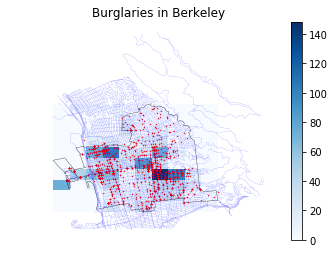

In [403]:
crime_boxes = berkeley_boxes_burglary.plot(column = 'crime_freq', cmap = 'Blues', legend = True);
city_of_berkeley.plot(ax = crime_boxes, color = 'none', edgecolor = 'black', linewidth = 0.3);
berkeley_streets.plot(ax = crime_boxes, linewidth = 0.1, color = 'blue');
# berkeley_streetlights.plot(ax = city, color = 'yellow', alpha = 0.5, markersize = 0.1)
bpd_burglary_gpd.plot(ax = crime_boxes, markersize = 0.2, color = 'red')
# city_boundary.plot(ax = city, linewidth = 0.25)

crime_boxes.axis('off')
crime_boxes.set_title('Burglaries in Berkeley')
plt.pyplot.savefig('cityofberkeleycrimes_burglaryfreq.png', dpi = 700)

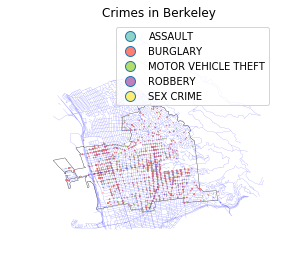

In [411]:
# crime_boxes = berkeley_boxes_burglary.plot(column = 'crime_freq', cmap = 'Blues', legend = True);
city = city_of_berkeley.plot(color = 'none', edgecolor = 'black', linewidth = 0.3);
berkeley_streets.plot(ax = city, linewidth = 0.1, color = 'blue');
# berkeley_streetlights.plot(ax = city, color = 'yellow', alpha = 0.5, markersize = 0.1)
combined_gpd.plot(ax = city, column = 'CVLEGEND', markersize = 0.2, cmap = 'Set3', legend = True)
# city_boundary.plot(ax = city, linewidth = 0.25)

city.axis('off');
city.set_title('Crimes in Berkeley');
plt.pyplot.savefig('cityofberkeleycrimes_noboxes.png', dpi = 700)